In [1]:
import anndata as ad
import scanpy as sc
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from tqdm import tqdm

from scipy.stats import gaussian_kde

# Oelen et al - CD8T (true) vs CD4T

In [3]:
preds = pd.read_csv('../../classifiers_results/test_data/BLC_OelenRESULTS.csv')
preds['label'] = preds['ct_pred'].copy()
preds['actual_ct'] = preds['CellType'].copy()

data_sctype = '../../classifiers_results/test_data/scType_OelenRESULTS.csv'
res = pd.read_csv(data_sctype, sep = ';')

res['ct_pred'] = res['customclassif'].copy()

ct_dic = {'Naive B cells':'B', 'Pre-B cells':'B',  'Plasmacytoid Dendritic cells': 'pDC', 'Non-classical monocytes':'Non-classical Monocyte', 'Natural killer  cells':'NK', 'Naive CD4+ T cells': 'CD4T', 'CD8+ NKT-like cells':'CD8T', 'Classical Monocytes':'Classical Monocyte', 'Platelets':'Platelet', 'Myeloid Dendritic cells': 'DC', 'γδ-T cells':'γδ-T cells', 
          'Effector CD8+ T cells':'CD8T', 'Memory CD4+ T cells': 'CD4T', 'Naive CD8+ T cells': 'CD8T', 'Effector CD4+ T cells':'CD4T', 'Memory CD8+ T cells':'CD8T', 
         'ISG expressing immune cells':'ISGs', 'Memory B cells':'B', 'Macrophages':'Macrophages', 'Megakaryocyte':'Megakaryocyte', 'Plasma B cells':'Plasma B', 'Progenitor cells': 'Progenitor cells', 'Erythroid-like and erythroid precursor cells': 'Erythroid-like and erythroid precursor cells',
         'Basophils':'Basophils', 'Neutrophils':'Neutrophil', 'Granulocytes':'Granulocytes', 'HSC/MPP cells':'HSC/MPP cells', 'Unknown':'Unknown', 'Erythroid-like and erythroid precursor cells':'Erythrocyte'}

res['ct_pred'] = res['ct_pred'].apply(lambda x: ct_dic[x])

res.ct_pred = res.ct_pred.astype(str)
res.CellType = res.CellType.astype(str)
#For "Macrophages" - set it according to their original CellType
inds = res[res.ct_pred == 'Macrophages'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']

#For "ISGs" - set it according to their original CellType
inds = res[res.ct_pred == 'ISGs'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']

#For Unknowns
inds = res[res.ct_pred == 'Unknown'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']


scpred = pd.read_csv('../../classifiers_results/test_data/scPred_OelenRESULTS.csv', sep = ';')

In [636]:
gse = sc.read('insert pathway to Oelen et al') 
sc.pp.normalize_total(gse, target_sum = 1e4)
df = gse.to_df()

In [637]:
#FOR SCPRED
#Take out predictions where BLC and scPred differs
res_nc = scpred[scpred.scpred_no_rejection != preds.label]
preds_nc = preds[preds.label != scpred.scpred_no_rejection]

#Take out difference in labeling for CD8T
blc_diff = preds_nc[preds_nc.label == 'CD8T']
benchmark_diff = res_nc[res_nc.scpred_no_rejection == 'CD4T']


# FOR SCTYPE
#Take out predictions where BLC and scType differs
#res_nc = res[res.ct_pred != preds.ct_pred]
#preds_nc = preds[preds.label != scpred.scpred_no_rejection]

#Take out difference in labeling for CD8T
#blc_diff = preds_nc[preds_nc.label == 'CD8T']
#benchmark_diff = res_nc[res_nc.ct_pred == 'CD4T']

In [638]:
blc_cd4t_scpred_cd8t = list(set(blc_diff['Unnamed: 0']) & set(benchmark_diff['Unnamed: 0']))

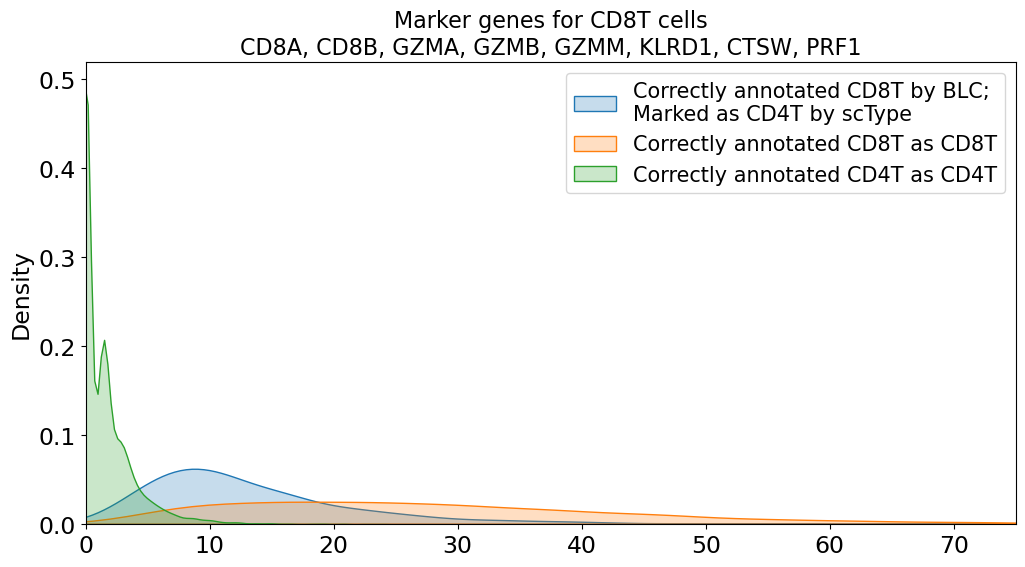

In [639]:
ct_true = 'CD8T'
ct_classified = 'CD4T'

#res_wrong = preds_nc[(preds_nc.ct_pred == ct_classified)&(preds_nc.CellType == ct_true)]
res_correct = preds[(preds.ct_pred == ct_classified) & (preds.CellType == ct_classified)]
res_correct2 = preds[(preds.ct_pred == ct_true) & (preds.CellType == ct_true)]


dfw = df.loc[blc_cd4t_scpred_cd8t] #df.loc[res_wrong['Unnamed: 0']]
dfc = df.loc[res_correct['Unnamed: 0']]
dfc2 = df.loc[res_correct2['Unnamed: 0']]

mgs1 = ['CD8A', 'CD8B', 'GZMA', 'GZMB', 'GZMM', 'KLRD1', 'CTSW', 'PRF1']

fig, ax = plt.subplots(figsize = (12,6))
sns.kdeplot(np.sum(dfw[dfw.columns[dfw.columns.isin(mgs1)]], axis = 1), fill = True, ax = ax, label = 'Correctly annotated CD8T by BLC;\nMarked as CD4T by scType')
sns.kdeplot(np.sum(dfc2[dfc2.columns[dfc2.columns.isin(mgs1)]], axis = 1), fill = True, ax = ax, label = 'Correctly annotated %s as %s'%(ct_true, ct_true))
sns.kdeplot(np.sum(dfc[dfc.columns[dfc.columns.isin(mgs1)]], axis = 1), fill = True, ax = ax, label = 'Correctly annotated %s as %s'%(ct_classified, ct_classified))

ax.legend(prop={'size':15})

ax.set_xlim(0,75)

ax.set_title('Marker genes for CD8T cells\n'+ ', '.join(mgs1), fontsize = 16)
ax.set_ylabel('Density', fontsize = 17)
ax.tick_params(axis="x", labelsize=17) 
ax.tick_params(axis="y", labelsize=17) 
#plt.suptitle('scType classification', fontsize = 14)
#plt.savefig('Oelen_CD4TvsCD8T_compSCTYPE.svg', bbox_inches = 'tight', format = 'svg', dpi = 200)

# Lee Covid - CD4T (true) vs CD8T

In [233]:
preds = pd.read_csv('../../classifiers_results/test_data/BLC_LeeCovRESULTS.csv')
preds['label'] = preds['ct_pred'].copy()
preds['actual_ct'] = preds['CellType'].copy()

data_sctype = '../../classifiers_results/test_data/scType_LeeCovRESULTS.csv'

res = pd.read_csv(data_sctype, sep = ';')

res['ct_pred'] = res['customclassif'].copy()
#res = res.rename(columns = {'customclassif':'ct_pred'})
ct_dic = {'Naive B cells':'B', 'Pre-B cells':'B',  'Plasmacytoid Dendritic cells': 'pDC', 'Non-classical monocytes':'Non-classical Monocyte', 'Natural killer  cells':'NK', 'Naive CD4+ T cells': 'CD4T', 'CD8+ NKT-like cells':'CD8T', 'Classical Monocytes':'Classical Monocyte', 'Platelets':'Platelet', 'Myeloid Dendritic cells': 'DC', 'γδ-T cells':'γδ-T cells', 
          'Effector CD8+ T cells':'CD8T', 'Memory CD4+ T cells': 'CD4T', 'Naive CD8+ T cells': 'CD8T', 'Effector CD4+ T cells':'CD4T', 'Memory CD8+ T cells':'CD8T', 
         'ISG expressing immune cells':'ISGs', 'Memory B cells':'B', 'Macrophages':'Macrophages', 'Megakaryocyte':'Megakaryocyte', 'Plasma B cells':'Plasma B', 'Progenitor cells': 'Progenitor cells', 'Erythroid-like and erythroid precursor cells': 'Erythroid-like and erythroid precursor cells',
         'Basophils':'Basophils', 'Neutrophils':'Neutrophil', 'Granulocytes':'Granulocytes', 'HSC/MPP cells':'HSC/MPP cells', 'Unknown':'Unknown', 'Erythroid-like and erythroid precursor cells':'Erythrocyte'}

res['ct_pred'] = res['ct_pred'].apply(lambda x: ct_dic[x])

res.ct_pred = res.ct_pred.astype(str)
res.CellType = res.CellType.astype(str)
#For "Macrophages" - we are being nice here and setting it according to their original CellType
inds = res[res.ct_pred == 'Macrophages'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']

#For "ISGs" - we are being nice here and setting it according to their original CellType
inds = res[res.ct_pred == 'ISGs'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']

#For Unknowns
inds = res[res.ct_pred == 'Unknown'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']


scpred = pd.read_csv('../../classifiers_results/test_data/scPred_LeeCovRESULTS.csv', sep = ';')

In [245]:
gse = sc.read('insert data path to Lee Covid here') 
sc.pp.normalize_total(gse, target_sum = 1e4)
df = gse.to_df()

### For BLC vs scPred

In [246]:
#Take out predictions where BLC and scPred differs
res_nc = scpred[scpred.scpred_no_rejection != preds.label]
preds_nc = preds[preds.label != scpred.scpred_no_rejection]

#Take out difference in labeling for CD8T
blc_diff = preds_nc[preds_nc.label == 'CD8T']
benchmark_diff = res_nc[res_nc.scpred_no_rejection == 'CD4T']



In [247]:
blc_cd4t_scpred_cd8t = list(set(blc_diff['Unnamed: 0']) & set(benchmark_diff['Unnamed: 0']))

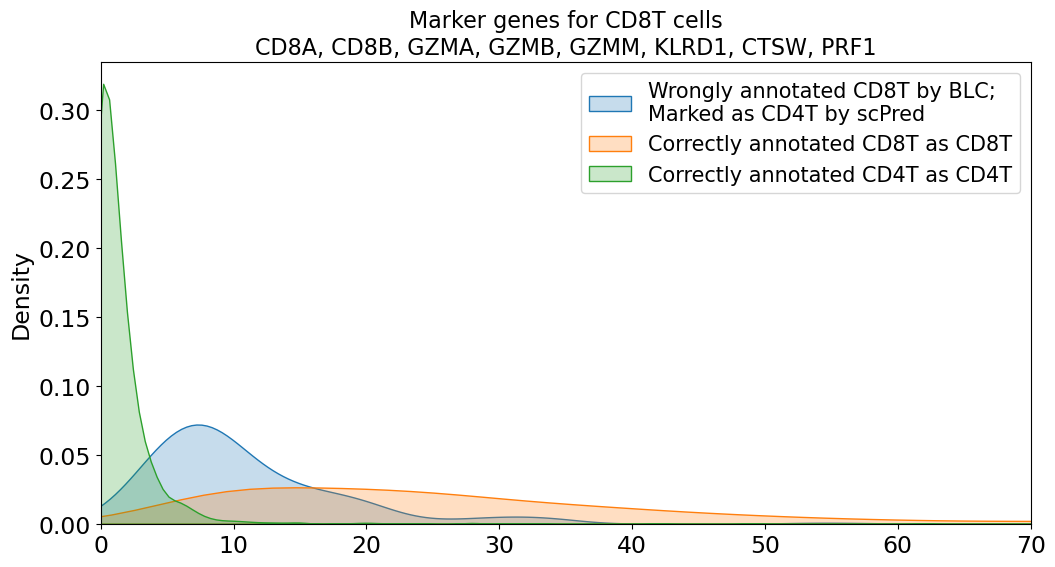

In [248]:
ct_true = 'CD4T'
ct_classified = 'CD8T'

#res_wrong = preds_nc[(preds_nc.ct_pred == ct_classified)&(preds_nc.CellType == ct_true)]
res_correct = preds[(preds.ct_pred == ct_classified) & (preds.CellType == ct_classified)]
res_correct2 = preds[(preds.ct_pred == ct_true) & (preds.CellType == ct_true)]


dfw = df.loc[blc_cd4t_scpred_cd8t] #df.loc[res_wrong['Unnamed: 0']]
dfc = df.loc[res_correct['Unnamed: 0']]
dfc2 = df.loc[res_correct2['Unnamed: 0']]

mgs1 = ['CD8A', 'CD8B', 'GZMA', 'GZMB', 'GZMM', 'KLRD1', 'CTSW', 'PRF1']


fig, ax = plt.subplots(figsize = (12,6))
#sns.kdeplot(np.sum(dfw[dfw.columns[dfw.columns.isin(mgs1)]], axis = 1), fill = True, ax = ax, label = 'Wrongly annotated %s as %s'%(ct_true, ct_classified))
sns.kdeplot(np.sum(dfw[dfw.columns[dfw.columns.isin(mgs1)]], axis = 1), fill = True, ax = ax, label = 'Wrongly annotated CD8T by BLC;\nMarked as CD4T by scPred')
sns.kdeplot(np.sum(dfc[dfc.columns[dfc.columns.isin(mgs1)]], axis = 1), fill = True, ax = ax, label = 'Correctly annotated %s as %s'%(ct_classified, ct_classified))
sns.kdeplot(np.sum(dfc2[dfc2.columns[dfc2.columns.isin(mgs1)]], axis = 1), fill = True, ax = ax, label = 'Correctly annotated %s as %s'%(ct_true, ct_true))

ax.legend(prop={'size':15})

ax.set_xlim(0,70)
#ax.set_xlim(0,75)
#ax.set_ylim(0,0.3)

ax.set_title('Marker genes for CD8T cells\n'+ ', '.join(mgs1), fontsize = 16)
ax.set_ylabel('Density', fontsize = 17)
ax.tick_params(axis="x", labelsize=17) 
ax.tick_params(axis="y", labelsize=17) 
#plt.suptitle('scType classification', fontsize = 14)
#plt.savefig('Lee_Cov_CD4TvsCD8T_compSCPRED.svg', bbox_inches = 'tight', format = 'svg', dpi = 200)

### For BLC vs scType

In [234]:
gse = sc.read('insert data path for Lee Covid here') 
sc.pp.normalize_total(gse, target_sum = 1e4)
df = gse.to_df()

In [236]:
#Take out predictions where BLC and scPred differs
res_nc = res[res.ct_pred != preds.ct_pred]
preds_nc = preds[preds.label != scpred.scpred_no_rejection]

#Take out difference in labeling for CD8T
blc_diff = preds_nc[preds_nc.label == 'CD8T']
benchmark_diff = res_nc[res_nc.ct_pred == 'CD4T']

In [237]:
blc_cd4t_scpred_cd8t = list(set(blc_diff['Unnamed: 0']) & set(benchmark_diff['Unnamed: 0']))

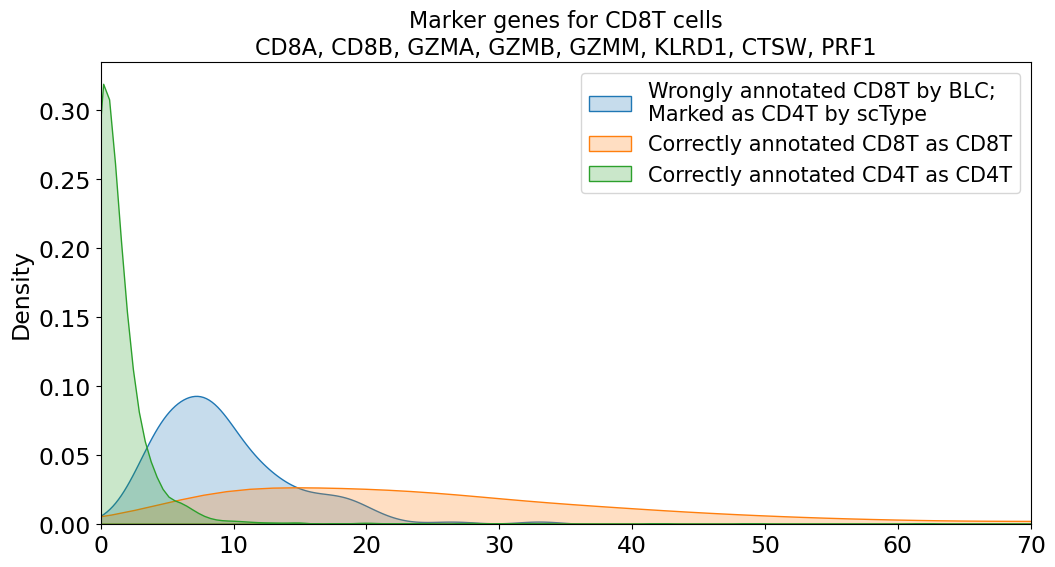

In [244]:
ct_true = 'CD4T'
ct_classified = 'CD8T'

res_correct = preds[(preds.ct_pred == ct_classified) & (preds.CellType == ct_classified)]
res_correct2 = preds[(preds.ct_pred == ct_true) & (preds.CellType == ct_true)]


dfw = df.loc[blc_cd4t_scpred_cd8t] #df.loc[res_wrong['Unnamed: 0']]
dfc = df.loc[res_correct['Unnamed: 0']]
dfc2 = df.loc[res_correct2['Unnamed: 0']]

mgs1 = ['CD8A', 'CD8B', 'GZMA', 'GZMB', 'GZMM', 'KLRD1', 'CTSW', 'PRF1']

fig, ax = plt.subplots(figsize = (12,6))
sns.kdeplot(np.sum(dfw[dfw.columns[dfw.columns.isin(mgs1)]], axis = 1), fill = True, ax = ax, label = 'Wrongly annotated CD8T by BLC;\nMarked as CD4T by scType')
sns.kdeplot(np.sum(dfc[dfc.columns[dfc.columns.isin(mgs1)]], axis = 1), fill = True, ax = ax, label = 'Correctly annotated %s as %s'%(ct_classified, ct_classified))
sns.kdeplot(np.sum(dfc2[dfc2.columns[dfc2.columns.isin(mgs1)]], axis = 1), fill = True, ax = ax, label = 'Correctly annotated %s as %s'%(ct_true, ct_true))

ax.legend(prop={'size':15})

ax.set_xlim(0,70)
#ax.set_xlim(0,75)
#ax.set_ylim(0,0.3)

ax.set_title('Marker genes for CD8T cells\n'+ ', '.join(mgs1), fontsize = 16)
ax.set_ylabel('Density', fontsize = 17)
ax.tick_params(axis="x", labelsize=17) 
ax.tick_params(axis="y", labelsize=17) 
#plt.suptitle('scType classification', fontsize = 14)
#plt.savefig('Lee_Cov_CD4TvsCD8T_compSCTYPE.svg', bbox_inches = 'tight', format = 'svg', dpi = 200)

# Lee Covid - DC (true) vs CM:

In [224]:
preds = pd.read_csv('../../classifiers_results/test_data/BLC_LeeCovRESULTS.csv')
preds['label'] = preds['ct_pred'].copy()
preds['actual_ct'] = preds['CellType'].copy()

data_sctype = '../../classifiers_results/test_data/scType_LeeCovRESULTS.csv'
res = pd.read_csv(data_sctype, sep = ';')

res['ct_pred'] = res['customclassif'].copy()
#res = res.rename(columns = {'customclassif':'ct_pred'})
ct_dic = {'Naive B cells':'B', 'Pre-B cells':'B',  'Plasmacytoid Dendritic cells': 'pDC', 'Non-classical monocytes':'Non-classical Monocyte', 'Natural killer  cells':'NK', 'Naive CD4+ T cells': 'CD4T', 'CD8+ NKT-like cells':'CD8T', 'Classical Monocytes':'Classical Monocyte', 'Platelets':'Platelet', 'Myeloid Dendritic cells': 'DC', 'γδ-T cells':'γδ-T cells', 
          'Effector CD8+ T cells':'CD8T', 'Memory CD4+ T cells': 'CD4T', 'Naive CD8+ T cells': 'CD8T', 'Effector CD4+ T cells':'CD4T', 'Memory CD8+ T cells':'CD8T', 
         'ISG expressing immune cells':'ISGs', 'Memory B cells':'B', 'Macrophages':'Macrophages', 'Megakaryocyte':'Megakaryocyte', 'Plasma B cells':'Plasma B', 'Progenitor cells': 'Progenitor cells', 'Erythroid-like and erythroid precursor cells': 'Erythroid-like and erythroid precursor cells',
         'Basophils':'Basophils', 'Neutrophils':'Neutrophil', 'Granulocytes':'Granulocytes', 'HSC/MPP cells':'HSC/MPP cells', 'Unknown':'Unknown', 'Erythroid-like and erythroid precursor cells':'Erythrocyte'}

res['ct_pred'] = res['ct_pred'].apply(lambda x: ct_dic[x])

res.ct_pred = res.ct_pred.astype(str)
res.CellType = res.CellType.astype(str)
#For "Macrophages" - we are being nice here and setting it according to their original CellType
inds = res[res.ct_pred == 'Macrophages'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']

#For "ISGs" - we are being nice here and setting it according to their original CellType
inds = res[res.ct_pred == 'ISGs'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']

#For Unknowns
inds = res[res.ct_pred == 'Unknown'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']


scpred = pd.read_csv('../../classifiers_results/test_data/scPred_LeeCovRESULTS.csv', sep = ';')

## BLC vs scPRED

In [225]:
gse = sc.read('insert datapath to Lee Covid here') 
#sc.pp.normalize_total(gse, target_sum = 1e4)
df = gse.to_df()

In [226]:
#Take out predictions where BLC and scPred differs
res_nc = scpred[scpred.scpred_no_rejection != preds.label]
preds_nc = preds[preds.label != scpred.scpred_no_rejection]

#Take out difference in labeling for DCs
blc_diff = preds_nc[preds_nc.label == 'DC']
benchmark_diff = res_nc[res_nc.scpred_no_rejection == 'Classical Monocyte']

In [227]:
blc_diff_scpred_cms = list(set(blc_diff['Unnamed: 0']) & set(benchmark_diff['Unnamed: 0']))

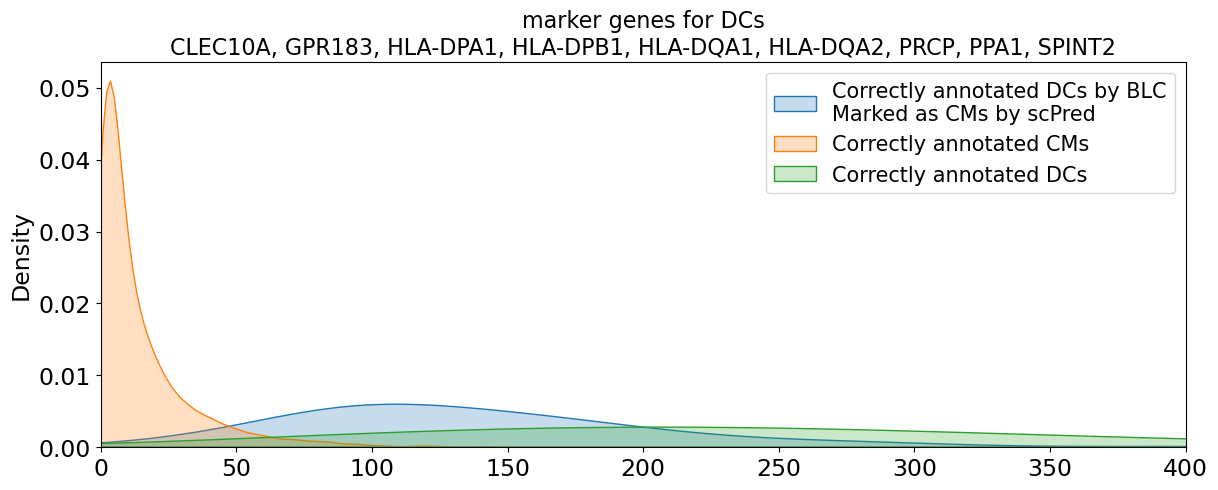

In [229]:
ct_true = 'DC'
ct_classified = 'Classical Monocyte'

#res_wrong = preds_nc[(preds_nc.ct_pred == ct_classified)&(preds_nc.CellType == ct_true)]
res_correct = preds[(preds.ct_pred == ct_classified) & (preds.CellType == ct_classified)]
res_correct2 = preds[(preds.ct_pred == ct_true) & (preds.CellType == ct_true)]

dfw = df.loc[blc_diff_scpred_cms] #df.loc[res_wrong['Unnamed: 0']]
dfc = df.loc[res_correct['Unnamed: 0']]
dfc2 = df.loc[res_correct2['Unnamed: 0']]

mgs1 = ['CLEC10A', 'GPR183', 'HLA-DPA1', 'HLA-DPB1', 'HLA-DQA1','HLA-DQA2', 'PRCP', 'PPA1', 'SPINT2']


fig, ax = plt.subplots(figsize = (14,5))
#sns.kdeplot(np.sum(dfw[dfw.columns[dfw.columns.isin(mgs1)]], axis = 1), fill = True, ax = ax, label = 'Wrongly annotated %s as %s'%(ct_true, ct_classified))
sns.kdeplot(np.sum(dfw[dfw.columns[dfw.columns.isin(mgs1)]], axis = 1), fill = True, ax = ax, label = 'Correctly annotated DCs by BLC\nMarked as CMs by scPred')
sns.kdeplot(np.sum(dfc[dfc.columns[dfc.columns.isin(mgs1)]], axis = 1), fill = True, ax = ax, label = 'Correctly annotated CMs')#%s as %s'%(ct_classified, ct_classified))
sns.kdeplot(np.sum(dfc2[dfc2.columns[dfc2.columns.isin(mgs1)]], axis = 1), fill = True, ax = ax, label = 'Correctly annotated DCs')#%s as %s'%(ct_true, ct_true))

ax.legend(prop={'size':15})

ax.set_xlim(0,400)
#ax.set_xlim(0,75)
#ax.set_ylim(0,0.3)

ax.set_title('marker genes for DCs\n'+ ', '.join(mgs1), fontsize = 16)
ax.set_ylabel('Density', fontsize = 17)
ax.tick_params(axis="x", labelsize=17) 
ax.tick_params(axis="y", labelsize=17) 
#plt.suptitle('scType classification', fontsize = 14)
#plt.savefig('Lee_Cov_DCsvsCMs_DCmarkers_compSCPRED.svg', bbox_inches = 'tight', format = 'svg', dpi = 200)

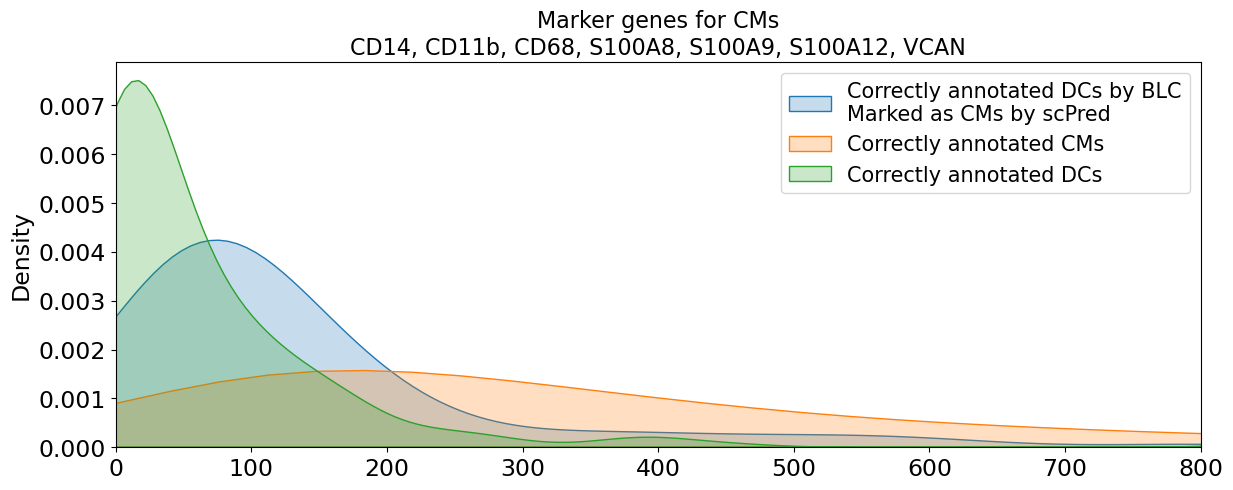

In [231]:
ct_true = 'DC'
ct_classified = 'Classical Monocyte'

res_wrong = res_nc[(res_nc.scpred_no_rejection == ct_classified)&(res_nc.CellType == ct_true)]
#res_wrong = res[(res.scpred_no_rejection == ct_classified)&(res.CellType == ct_true)]
res_correct = scpred[(scpred.scpred_no_rejection == ct_classified) & (scpred.CellType == ct_classified)]
res_correct2 = scpred[(scpred.scpred_no_rejection == ct_true) & (scpred.CellType == ct_true)]

dfw = df.loc[blc_diff_scpred_cms] #df.loc[res_wrong['Unnamed: 0']]
dfc = df.loc[res_correct['Unnamed: 0']]
dfc2 = df.loc[res_correct2['Unnamed: 0']]

mgs1 = ['CD14', 'CD11b', 'CD68', 'S100A8', 'S100A9','S100A12', 'VCAN']


fig, ax = plt.subplots(figsize = (14,5))
sns.kdeplot(np.sum(dfw[dfw.columns[dfw.columns.isin(mgs1)]], axis = 1), fill = True, ax = ax, label = 'Correctly annotated DCs by BLC\nMarked as CMs by scPred')
sns.kdeplot(np.sum(dfc[dfc.columns[dfc.columns.isin(mgs1)]], axis = 1), fill = True, ax = ax, label = 'Correctly annotated CMs')#%s as %s'%(ct_classified, ct_classified))
sns.kdeplot(np.sum(dfc2[dfc2.columns[dfc2.columns.isin(mgs1)]], axis = 1), fill = True, ax = ax, label = 'Correctly annotated DCs')#%s as %s'%(ct_true, ct_true))


ax.legend(prop={'size':15})

ax.set_xlim(0,800)
#ax.set_xlim(0,75)
#ax.set_ylim(0,0.3)

ax.set_title('Marker genes for CMs\n'+ ', '.join(mgs1), fontsize = 16)
ax.set_ylabel('Density', fontsize = 17)
ax.tick_params(axis="x", labelsize=17) 
ax.tick_params(axis="y", labelsize=17) 
#plt.suptitle('scType classification', fontsize = 14)
#plt.savefig('Lee_Cov_DCsvsCMs_CMmarkers_compSCPRED.svg', bbox_inches = 'tight', format = 'svg', dpi = 200)